## Purpose:
This notebook applies the best algorithm + best k-value (determined from clustering_full) to every single trial in the dataset.
## What is being done:
- From the sample-based analysis, select the best clustering choices:
Raw → KMeans 
PCA → KMeans 
Chunked raw → Agglomerative 
Chunked PCA → Agglomerative
- For each representation, run the chosen clustering algorithm on all trials.
- extract and save:
Davies–Bouldin
Silhouette
WCSS
Cluster-size distributions
- These results are saved as CSV files so the heavy computation doesn’t need to be repeated.
- Regional analysis is performed on selected sample trails
- Across trail clsutering is performed and evaluatedon same matrics



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import h5py


import clustering_util_full as cu

data_root = Path("Final Project/brain-to-text-25/t15_copyTask_neuralData/hdf5_data_final")
csv_path = Path("trial_index.csv")

if csv_path.exists():
    df_trials = pd.read_csv(csv_path)
else:
    trial_list = []
    for session_dir in sorted(data_root.glob("t15.*")):
        for split in ["train", "val", "test"]:
            h5_path = session_dir / f"data_{split}.hdf5"
            if not h5_path.exists():
                continue
            with h5py.File(h5_path, "r") as h5:
                for trial_key in h5.keys():
                    if trial_key.startswith("trial_"):
                        trial_list.append({
                            "session": session_dir.name,
                            "split": split,
                            "trial": trial_key,
                            "path": str(h5_path),
                        })
    df_trials = pd.DataFrame(trial_list)
    df_trials.to_csv(csv_path, index=False)

df_val = df_trials[df_trials['split'] == 'val'].reset_index(drop=True)
print('Total trials (all):', len(df_trials))
print('Validation trials selected:', len(df_val))
len(df_trials), df_trials.head()


Total trials (all): 10948
Validation trials selected: 1426


(10948,
           session  split       trial  \
 0  t15.2023.08.11  train  trial_0000   
 1  t15.2023.08.11  train  trial_0001   
 2  t15.2023.08.11  train  trial_0002   
 3  t15.2023.08.11  train  trial_0003   
 4  t15.2023.08.11  train  trial_0004   
 
                                                 path  
 0  /Users/erika/Desktop/Computational Tools for D...  
 1  /Users/erika/Desktop/Computational Tools for D...  
 2  /Users/erika/Desktop/Computational Tools for D...  
 3  /Users/erika/Desktop/Computational Tools for D...  
 4  /Users/erika/Desktop/Computational Tools for D...  )

In [4]:
BEST_K_RAW = 7         
#BEST_K_PCA = 6         
BEST_K_CHUNK_RAW = 8
#BEST_K_CHUNK_PCA = 8


PCA_DIM = 30
WINDOW_SIZE = 10
OVERLAP = 0


In [5]:
df_db_raw_all, df_sil_raw_all, df_wcss_raw_all, df_sizes_raw_all = cu.evaluate_raw(
    df_val,
    k_values=[BEST_K_RAW],      # <--- singleton list
    algorithms=["kmeans"],     
    n_reps=None,               
    shrink=None,
    max_trials=None            # None = ALL trials
)

df_db_raw_all.to_csv("metrics_raw_kmeans_db.csv", index=False)
df_sil_raw_all.to_csv("metrics_raw_kmeans_sil.csv", index=False)
df_wcss_raw_all.to_csv("metrics_raw_kmeans_wcss.csv", index=False)
df_sizes_raw_all.to_csv("metrics_raw_kmeans_sizes.csv", index=False)

df_db_raw_all.head()


,trial,algorithm,k,db
0,trial_0000,kmeans,7,4.562306
1,trial_0001,kmeans,7,4.288113
2,trial_0002,kmeans,7,4.501929
3,trial_0003,kmeans,7,3.578237
4,trial_0004,kmeans,7,4.358047


In [ ]:
# df_db_pca_all, df_sil_pca_all, df_wcss_pca_all, df_sizes_pca_all = cu.evaluate_pca(
#     df_val,
#     k_values=[BEST_K_PCA],      # <--- singleton list
#     algorithms=["kmeans"],   
#     pca_dim=PCA_DIM,
#     n_reps=None,
#     shrink=None,
#     max_trials=None
# )

# df_db_pca_all.to_csv("metrics_pca_kmeans_db.csv", index=False)
# df_sil_pca_all.to_csv("metrics_pca_kmeans_sil.csv", index=False)
# df_wcss_pca_all.to_csv("metrics_pca_kmeans_wcss.csv", index=False)
# df_sizes_pca_all.to_csv("metrics_pca_kmeans_sizes.csv", index=False)

# df_db_pca_all.head()


,trial,algorithm,k,db
0,trial_0000,kmeans,6,3.462668
1,trial_0001,kmeans,6,3.552190
2,trial_0002,kmeans,6,2.917930
3,trial_0003,kmeans,6,3.534286
4,trial_0004,kmeans,6,3.061683


In [6]:
df_db_chunk_raw_all, df_sil_chunk_raw_all, df_wcss_chunk_raw_all, df_sizes_chunk_raw_all = cu.evaluate_chunked_raw(
    df_val,
    k_values=[BEST_K_CHUNK_RAW],      # <--- singleton list
    algorithms=["agglomerative"],   # best for chunked raw
    window_size=WINDOW_SIZE,
    overlap=OVERLAP,
    pca_dim=None,                   
    n_reps=None,
    shrink=None,
    max_trials=None
)

df_db_chunk_raw_all.to_csv("metrics_chunk_raw_agg_db.csv", index=False)
df_sil_chunk_raw_all.to_csv("metrics_chunk_raw_agg_sil.csv", index=False)
df_wcss_chunk_raw_all.to_csv("metrics_chunk_raw_agg_wcss.csv", index=False)
df_sizes_chunk_raw_all.to_csv("metrics_chunk_raw_agg_sizes.csv", index=False)

df_db_chunk_raw_all.head()


,trial,algorithm,k,db
0,trial_0000,agglomerative,8,2.067854
1,trial_0001,agglomerative,8,2.263552
2,trial_0002,agglomerative,8,2.078777
3,trial_0003,agglomerative,8,2.177421
4,trial_0004,agglomerative,8,2.075887


In [ ]:
# df_db_chunk_pca_all, df_sil_chunk_pca_all, df_wcss_chunk_pca_all, df_sizes_chunk_pca_all = cu.evaluate_chunked_pca(
#     df_val,
#     k_values=[BEST_K_CHUNK_PCA],      # <--- singleton list
#     algorithms=["agglomerative"],   # best for chunked PCA
#     window_size=WINDOW_SIZE,
#     pca_dim=PCA_DIM,
#     overlap=OVERLAP,
#     n_reps=None,
#     shrink=None,
#     max_trials=None
# )

# df_db_chunk_pca_all.to_csv("metrics_chunk_pca_agg_db.csv", index=False)
# df_sil_chunk_pca_all.to_csv("metrics_chunk_pca_agg_sil.csv", index=False)
# df_wcss_chunk_pca_all.to_csv("metrics_chunk_pca_agg_wcss.csv", index=False)
# df_sizes_chunk_pca_all.to_csv("metrics_chunk_pca_agg_sizes.csv", index=False)

# df_db_chunk_pca_all.head()


,trial,algorithm,k,db
0,trial_0000,agglomerative,8,2.021527
1,trial_0001,agglomerative,8,2.008248
2,trial_0002,agglomerative,8,1.508814
3,trial_0003,agglomerative,8,2.017317
4,trial_0004,agglomerative,8,1.747272


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


# Add representation labels
db_raw   = df_db_raw_all.copy()
#db_pca   = df_db_pca_all.copy()
db_craw  = df_db_chunk_raw_all.copy()
#db_cpca  = df_db_chunk_pca_all.copy()

db_raw["rep"]  = "raw"
#db_pca["rep"]  = "pca"
db_craw["rep"] = "chunk_raw"
#db_cpca["rep"] = "chunk_pca"

df_db_all = pd.concat([db_raw, db_craw], ignore_index=True)
sil_raw   = df_sil_raw_all.copy()
#sil_pca   = df_sil_pca_all.copy()
sil_craw  = df_sil_chunk_raw_all.copy()
#sil_cpca  = df_sil_chunk_pca_all.copy()

sil_raw["rep"]  = "raw"
#sil_pca["rep"]  = "pca"
sil_craw["rep"] = "chunk_raw"
#sil_cpca["rep"] = "chunk_pca"

df_sil_all = pd.concat([sil_raw, sil_craw], ignore_index=True)

wcss_raw   = df_wcss_raw_all.copy()
#wcss_pca   = df_wcss_pca_all.copy()
wcss_craw  = df_wcss_chunk_raw_all.copy()
#wcss_cpca  = df_wcss_chunk_pca_all.copy()

wcss_raw["rep"]  = "raw"
#wcss_pca["rep"]  = "pca"
wcss_craw["rep"] = "chunk_raw"
#wcss_cpca["rep"] = "chunk_pca"

df_wcss_all = pd.concat([wcss_raw, wcss_craw], ignore_index=True)
df_db_all.head(), df_sil_all.head(), df_wcss_all.head()


(        trial algorithm  k        db  rep
 0  trial_0000    kmeans  7  4.562306  raw
 1  trial_0001    kmeans  7  4.288113  raw
 2  trial_0002    kmeans  7  4.501929  raw
 3  trial_0003    kmeans  7  3.578237  raw
 4  trial_0004    kmeans  7  4.358047  raw,
         trial algorithm  k       sil  rep
 0  trial_0000    kmeans  7  0.001476  raw
 1  trial_0001    kmeans  7  0.020365  raw
 2  trial_0002    kmeans  7  0.022926  raw
 3  trial_0003    kmeans  7  0.020866  raw
 4  trial_0004    kmeans  7  0.009670  raw,
         trial algorithm  k          wcss  rep
 0  trial_0000    kmeans  7  19047.601925  raw
 1  trial_0001    kmeans  7  15488.614912  raw
 2  trial_0002    kmeans  7  10294.246601  raw
 3  trial_0003    kmeans  7  19905.991215  raw
 4  trial_0004    kmeans  7  11968.749248  raw)

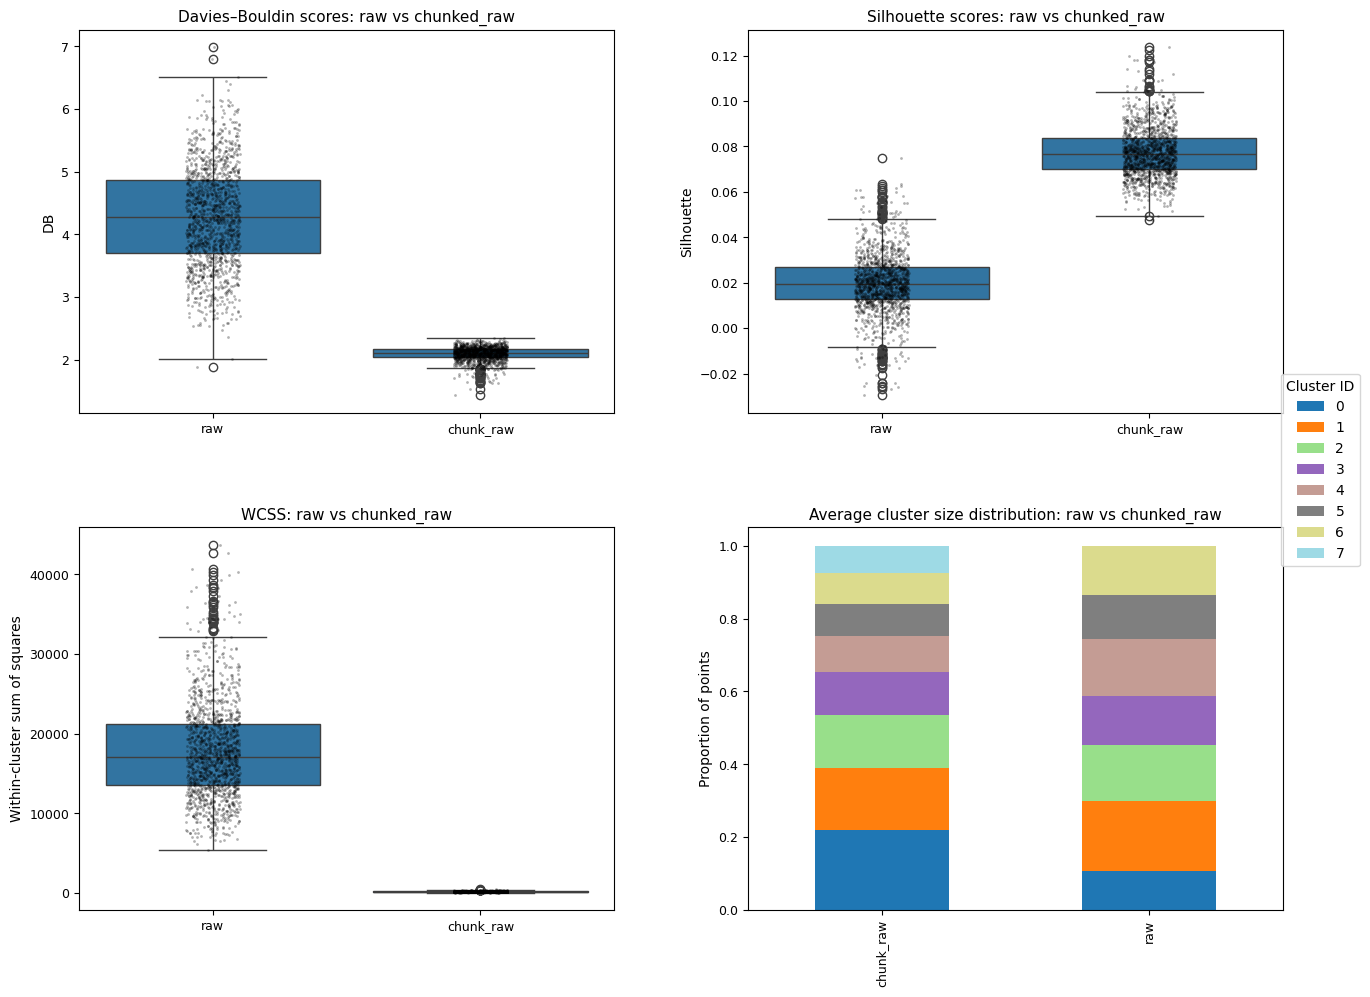

In [8]:
sizes_raw   = df_sizes_raw_all.copy().fillna(0)
# keep only raw and chunked-raw reps for the comparison
sizes_craw  = df_sizes_chunk_raw_all.copy().fillna(0)

sizes_raw["rep"]  = "raw"
sizes_craw["rep"] = "chunk_raw"

# build combined sizes DF with only raw and chunked-raw
df_sizes_all = pd.concat([sizes_raw, sizes_craw], ignore_index=True)

# get only the cluster columns (exclude metadata cols)
meta_cols = ["trial", "algorithm", "k", "rep"]
cluster_cols = [c for c in df_sizes_all.columns if c not in meta_cols]

# mean cluster size per rep (averaged over trials)
sizes_mean = df_sizes_all.groupby("rep")[cluster_cols].mean()

# convert to proportions
sizes_mean_pct = sizes_mean.div(sizes_mean.sum(axis=1), axis=0)


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Davies–Bouldin box+strip
sns.boxplot(data=df_db_all, x="rep", y="db", ax=axes[0, 0])
sns.stripplot(data=df_db_all, x="rep", y="db", color="black", alpha=0.3, size=2, ax=axes[0, 0])
axes[0, 0].set_title("Davies–Bouldin scores: raw vs chunked_raw", fontsize=12)
axes[0, 0].set_ylabel("DB", fontsize=10)
axes[0, 0].set_xlabel("")

# Silhouette box+strip
sns.boxplot(data=df_sil_all, x="rep", y="sil", ax=axes[0, 1])
sns.stripplot(data=df_sil_all, x="rep", y="sil", color="black", alpha=0.3, size=2, ax=axes[0, 1])
axes[0, 1].set_title("Silhouette scores: raw vs chunked_raw", fontsize=12)
axes[0, 1].set_ylabel("Silhouette", fontsize=10)
axes[0, 1].set_xlabel("")

# WCSS box+strip
sns.boxplot(data=df_wcss_all, x="rep", y="wcss", ax=axes[1, 0])
sns.stripplot(data=df_wcss_all, x="rep", y="wcss", color="black", alpha=0.3, size=2, ax=axes[1, 0])
axes[1, 0].set_title("WCSS: raw vs chunked_raw", fontsize=12)
axes[1, 0].set_ylabel("Within-cluster sum of squares", fontsize=10)
axes[1, 0].set_xlabel("")

# Bottom-right: Cluster size distribution (stacked bar per representation)
# sizes_mean_pct index = ['raw','chunk_raw'] and columns are cluster_*
sizes_mean_pct.plot(kind="bar", stacked=True, colormap="tab20", ax=axes[1, 1], legend=False)
axes[1, 1].set_title("Average cluster size distribution: raw vs chunked_raw", fontsize=12)
axes[1, 1].set_ylabel("Proportion of points", fontsize=10)
axes[1, 1].set_xlabel("")

handles, labels = axes[1, 1].get_legend_handles_labels()
if handles:
    # place legend outside the plot area on the right
    fig.legend(handles, labels, title='Cluster ID', loc='center right', bbox_to_anchor=(0.98, 0.5))

plt.subplots_adjust(left=0.06, right=0.92, top=0.94, bottom=0.06, hspace=0.30, wspace=0.25)
for ax in axes.flatten():
    ax.title.set_fontsize(11)
    ax.tick_params(axis='both', which='major', labelsize=9)

plt.show()


In [9]:
# export data

import pickle
WINDOW_SIZE = 10
OVERLAP = 0

per_trial_clusters_chunk_raw = {}

for _, row in df_val.iterrows():
    trial_id = row["trial"]

    with h5py.File(row["path"], "r") as h5:
        features = h5[trial_id]["input_features"][:]

    # preprocess + chunk
    _, X_raw = cu.preprocess_trial_features(features)
    X_chunks, bounds = cu.chunk_time_series(X_raw, window_size=WINDOW_SIZE, overlap=OVERLAP)

    # best algorithm for chunked raw: agglomerative
    labels, X_used = cu.run_agglomerative(X_chunks, n_clusters=BEST_K_CHUNK_RAW)

    trial_mapping = {}
    for c in np.unique(labels):
        idx = np.where(labels == c)[0]
        desc_list = []
        for j in idx:
            start_bin, end_bin = bounds[j]
            desc = (
                f"{row['split']}/"
                f"{row['session']}/"
                f"{trial_id}_chunk{j}_bins{start_bin}-{end_bin}"
            )
            desc_list.append(desc)
        trial_mapping[int(c)] = desc_list

    per_trial_clusters_chunk_raw[trial_id] = trial_mapping

# example
example_trial = list(per_trial_clusters_chunk_raw.keys())[0]
print("Example trial:", example_trial)
print(per_trial_clusters_chunk_raw[example_trial])

# save mapping
with open("per_trial_clusters_chunk_raw.pkl", "wb") as f:
    pickle.dump(per_trial_clusters_chunk_raw, f)

print("\nSaved per-trial chunked RAW clusters to per_trial_clusters_chunk_raw.pkl")



# export for raw data (no chunking)
from sklearn.cluster import KMeans
per_trial_clusters_raw = {}

for _, row in df_val.iterrows():
    trial_id = row['trial']

    with h5py.File(row['path'], 'r') as h5:
        features = h5[trial_id]['input_features'][:]

    # preprocess (returns metadata, X_raw where rows are time-bins)
    _, X_raw = cu.preprocess_trial_features(features)

    # Run KMeans on the raw time-bin features for this trial
    kmeans = KMeans(n_clusters=BEST_K_RAW, random_state=0)
    labels = kmeans.fit_predict(X_raw)

    trial_mapping = {}
    for c in np.unique(labels):
        idx = np.where(labels == c)[0]
        desc_list = [f"{row['split']}/{row['session']}/{row['trial']}_bin{t}" for t in idx]
        trial_mapping[int(c)] = desc_list

    per_trial_clusters_raw[trial_id] = trial_mapping

if len(per_trial_clusters_raw) > 0:
    example_trial_raw = next(iter(per_trial_clusters_raw.keys()))
    print('Example RAW trial:', example_trial_raw)
    print(per_trial_clusters_raw[example_trial_raw])
else:
    print('No RAW per-trial clusters were produced (check df_val)')

with open('per_trial_clusters_raw.pkl', 'wb') as f:
    pickle.dump(per_trial_clusters_raw, f)

print('Saved per-trial RAW clusters to per_trial_clusters_raw.pkl')


Example trial: trial_0000
{0: ['val/t15.2025.04.13/trial_0000_chunk3_bins30-40', 'val/t15.2025.04.13/trial_0000_chunk4_bins40-50', 'val/t15.2025.04.13/trial_0000_chunk13_bins130-140', 'val/t15.2025.04.13/trial_0000_chunk14_bins140-150', 'val/t15.2025.04.13/trial_0000_chunk15_bins150-160', 'val/t15.2025.04.13/trial_0000_chunk28_bins280-290', 'val/t15.2025.04.13/trial_0000_chunk29_bins290-300', 'val/t15.2025.04.13/trial_0000_chunk30_bins300-310', 'val/t15.2025.04.13/trial_0000_chunk31_bins310-320', 'val/t15.2025.04.13/trial_0000_chunk38_bins380-390', 'val/t15.2025.04.13/trial_0000_chunk39_bins390-400', 'val/t15.2025.04.13/trial_0000_chunk40_bins400-410'], 1: ['val/t15.2025.04.13/trial_0000_chunk23_bins230-240', 'val/t15.2025.04.13/trial_0000_chunk24_bins240-250', 'val/t15.2025.04.13/trial_0000_chunk25_bins250-260', 'val/t15.2025.04.13/trial_0000_chunk49_bins490-500', 'val/t15.2025.04.13/trial_0000_chunk50_bins500-510'], 2: ['val/t15.2025.04.13/trial_0000_chunk6_bins60-70', 'val/t15.2025.

KeyboardInterrupt: 

Representative trials:


,session,split,trial
0,t15.2023.10.13,val,trial_0022
1,t15.2023.12.10,val,trial_0007
2,t15.2023.10.15,val,trial_0023



Trial 1/3  |  session=t15.2023.10.13  split=val  trial=trial_0022

[RAW] Mean region activation per cluster:


,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.339003,0.341903,0.314227,0.337411
1,0.290228,0.281977,0.298875,0.241082
2,0.288362,0.274168,0.248917,0.305039
3,0.307071,0.298109,0.236327,0.306862
4,0.399525,0.263240,0.269524,0.282450
5,0.267842,0.274858,0.259581,0.296940
6,0.351264,0.280495,0.249024,0.297428



[RAW] Region composition per cluster (fractions):


region,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.272727,0.363636,0.272727,0.090909
1,0.328671,0.244755,0.363636,0.062937
2,0.500000,0.000000,0.000000,0.500000
3,0.416667,0.250000,0.000000,0.333333
4,1.000000,0.000000,0.000000,0.000000
5,0.122754,0.179641,0.098802,0.598802
6,0.750000,0.000000,0.000000,0.250000


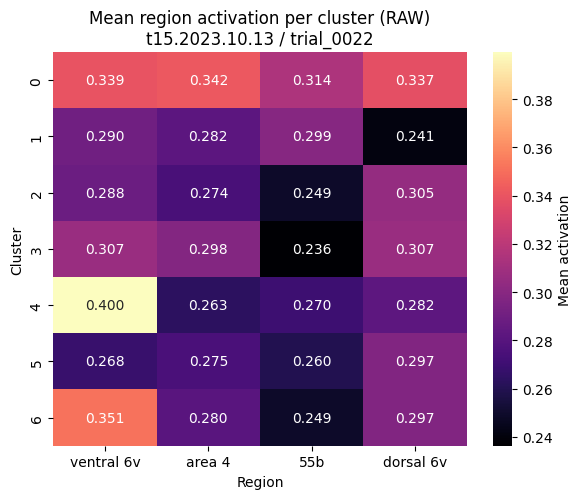

<Figure size 600x510 with 0 Axes>

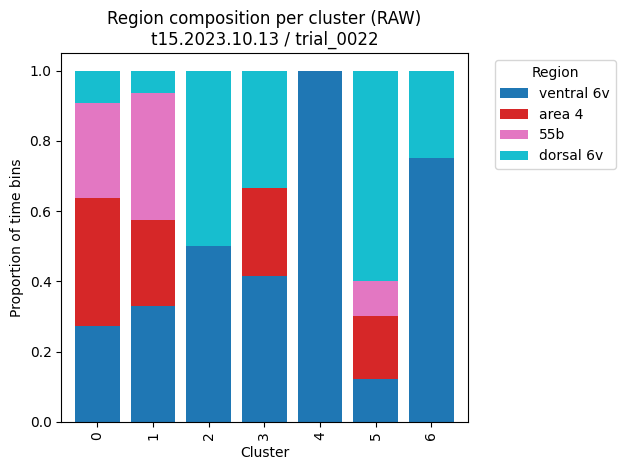


[CHUNKED] Mean region activation per cluster:


,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.270171,0.279169,0.263325,0.291289
1,0.276273,0.267937,0.275611,0.293905
2,0.302280,0.297400,0.280125,0.272317
3,0.277057,0.280435,0.286747,0.251488
4,0.262217,0.272246,0.260129,0.305998
5,0.285623,0.273882,0.283636,0.264497
6,0.280212,0.282102,0.245659,0.305916
7,0.279820,0.271897,0.255830,0.283654



[CHUNKED] Region composition per cluster (fractions):


region,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.066667,0.266667,0.000000,0.666667
1,0.125000,0.000000,0.000000,0.875000
2,0.428571,0.428571,0.000000,0.142857
3,0.000000,0.428571,0.571429,0.000000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.250000,0.500000,0.250000
6,0.000000,0.000000,0.000000,1.000000
7,0.500000,0.000000,0.000000,0.500000


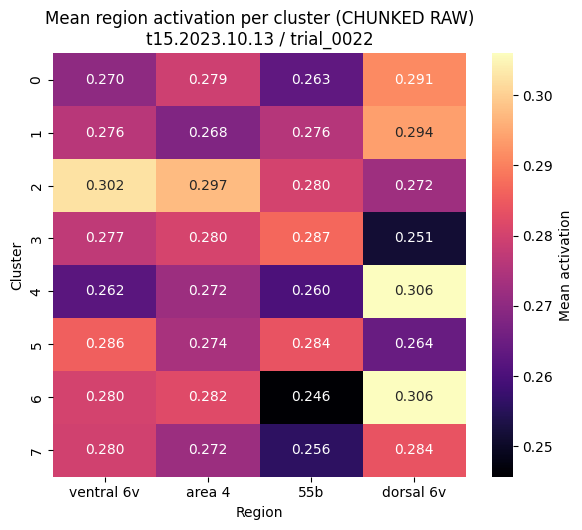

<Figure size 600x540 with 0 Axes>

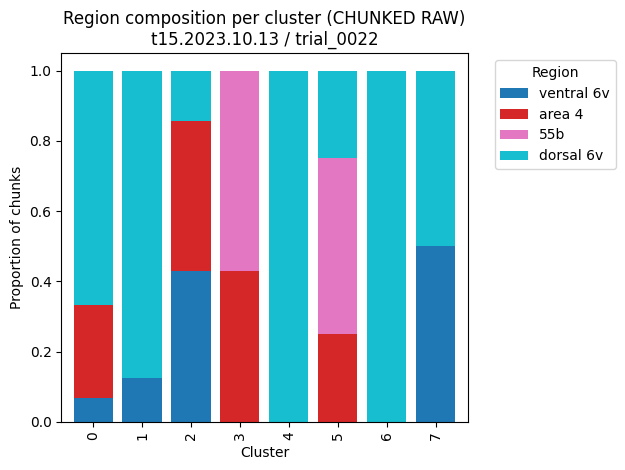


Trial 2/3  |  session=t15.2023.12.10  split=val  trial=trial_0007

[RAW] Mean region activation per cluster:

[RAW] Mean region activation per cluster:


,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.212369,0.218233,0.310904,0.290133
1,0.355566,0.339717,0.262058,0.265177
2,0.382476,0.356063,0.245800,0.264384
3,0.295069,0.303499,0.252492,0.265852
4,0.223927,0.228177,0.289699,0.285131
5,0.322961,0.393821,0.291434,0.298640
6,0.313186,0.382607,0.240327,0.262584



[RAW] Region composition per cluster (fractions):


region,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.000000,0.027778,0.722222,0.250000
1,0.630769,0.353846,0.015385,0.000000
2,0.736842,0.263158,0.000000,0.000000
3,0.320930,0.520930,0.051163,0.106977
4,0.022901,0.083969,0.450382,0.442748
5,0.200000,0.800000,0.000000,0.000000
6,0.000000,1.000000,0.000000,0.000000


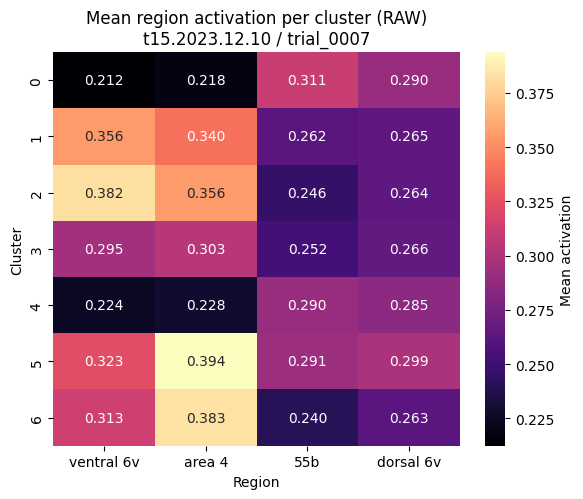

<Figure size 600x510 with 0 Axes>

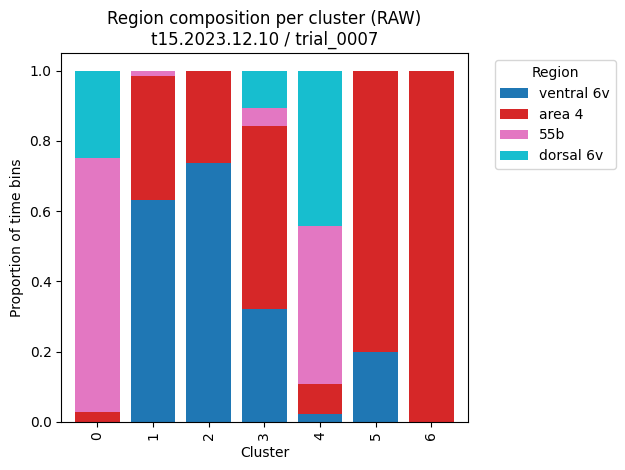


[CHUNKED] Mean region activation per cluster:


,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.292876,0.293192,0.269796,0.272516
1,0.338465,0.322517,0.250394,0.263912
2,0.329302,0.346077,0.249246,0.262402
3,0.234072,0.245937,0.297583,0.283778
4,0.208111,0.213631,0.288087,0.284555
5,0.342823,0.322987,0.261333,0.266765
6,0.276605,0.288170,0.257767,0.274278
7,0.209026,0.215950,0.308988,0.278292



[CHUNKED] Region composition per cluster (fractions):


region,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.181818,0.636364,0.090909,0.090909
1,1.000000,0.000000,0.000000,0.000000
2,0.250000,0.750000,0.000000,0.000000
3,0.000000,0.285714,0.571429,0.142857
4,0.000000,0.000000,0.500000,0.500000
5,0.500000,0.500000,0.000000,0.000000
6,0.000000,0.916667,0.000000,0.083333
7,0.000000,0.000000,1.000000,0.000000


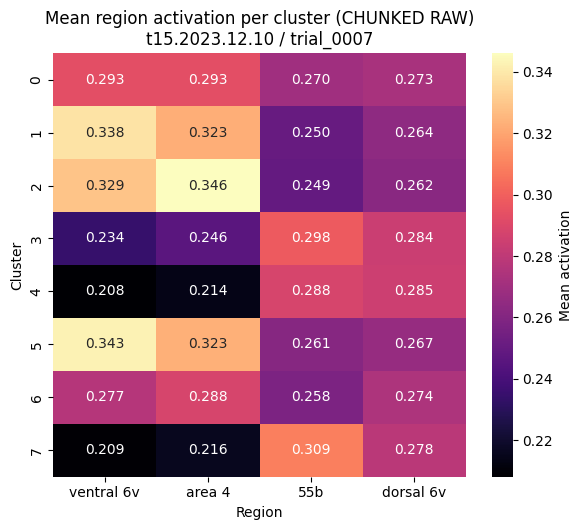

<Figure size 600x540 with 0 Axes>

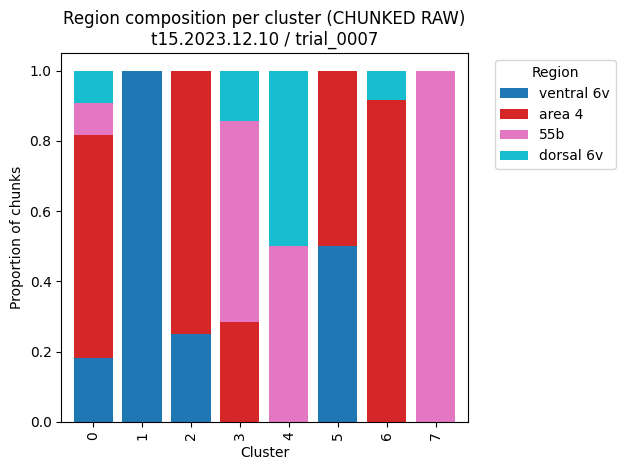


Trial 3/3  |  session=t15.2023.10.15  split=val  trial=trial_0023

[RAW] Mean region activation per cluster:

[RAW] Mean region activation per cluster:


,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.291958,0.288126,0.290874,0.249560
1,0.261607,0.282532,0.272755,0.272076
2,0.258365,0.252703,0.251196,0.289974
3,0.284905,0.278907,0.287494,0.278286
4,0.301851,0.275990,0.298867,0.262004
5,0.221463,0.243536,0.273360,0.303097
6,0.262003,0.271677,0.237341,0.290161



[RAW] Region composition per cluster (fractions):


region,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.410256,0.269231,0.269231,0.051282
1,0.180000,0.366667,0.233333,0.220000
2,0.155440,0.072539,0.056995,0.715026
3,0.200000,0.100000,0.500000,0.200000
4,0.430769,0.200000,0.292308,0.076923
5,0.000000,0.000000,0.000000,1.000000
6,0.000000,0.250000,0.000000,0.750000


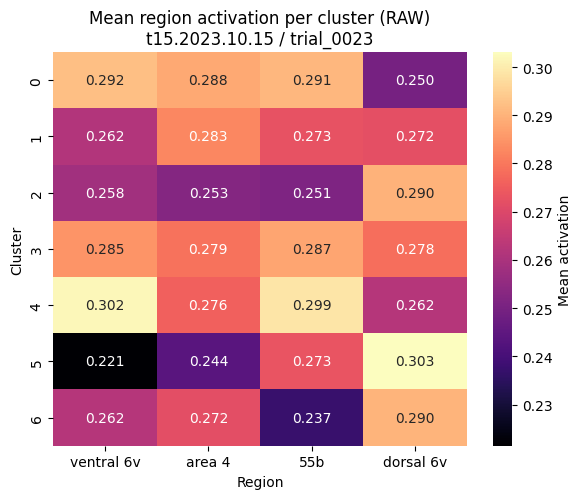

<Figure size 600x510 with 0 Axes>

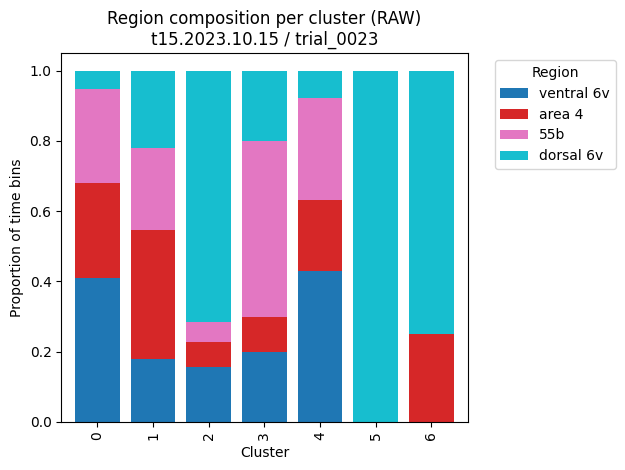


[CHUNKED] Mean region activation per cluster:


,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.274119,0.264203,0.261812,0.284860
1,0.271784,0.278038,0.280249,0.259946
2,0.267322,0.277590,0.274032,0.274708
3,0.273044,0.269041,0.281393,0.272640
4,0.273293,0.266524,0.263083,0.285057
5,0.265734,0.265113,0.255103,0.294558
6,0.269298,0.270664,0.277096,0.247592
7,0.263968,0.263067,0.249400,0.290508



[CHUNKED] Region composition per cluster (fractions):


region,ventral 6v,area 4,55b,dorsal 6v
cluster,,,,
0,0.125000,0.000000,0.000000,0.875000
1,0.300000,0.100000,0.300000,0.300000
2,0.111111,0.555556,0.111111,0.222222
3,0.375000,0.125000,0.250000,0.250000
4,0.000000,0.000000,0.000000,1.000000
5,0.000000,0.000000,0.000000,1.000000
6,0.250000,0.000000,0.750000,0.000000
7,0.000000,0.000000,0.000000,1.000000


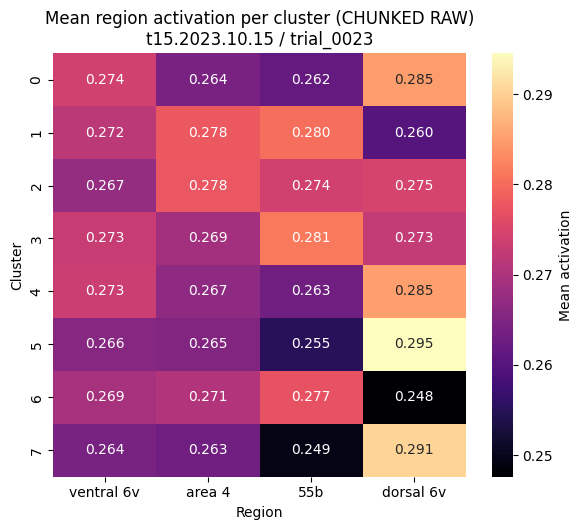

<Figure size 600x540 with 0 Axes>

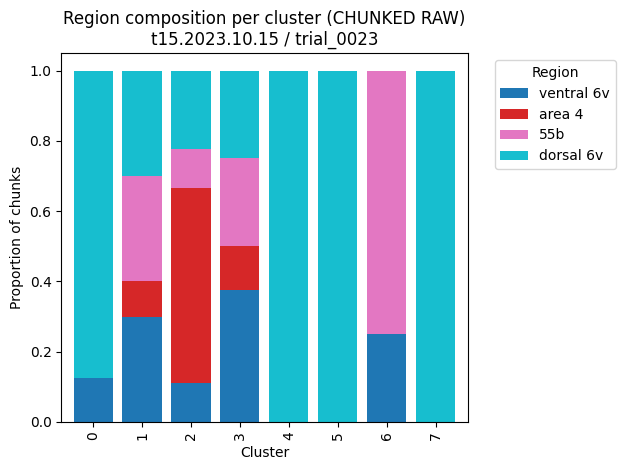

In [10]:
# ============================================================
# 1–3 REPRESENTATIVE TRIALS WITH REGION INFO (RAW + CHUNKED RAW)
# ============================================================

import h5py
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

_required = ["df_val", "cu", "BEST_K_RAW", "BEST_K_CHUNK_RAW", "WINDOW_SIZE", "OVERLAP"]
missing = [n for n in _required if n not in globals()]
if missing:
    raise RuntimeError(f"Missing required notebook variables: {missing}")

# Choose 3 representative trials
n_rep = min(3, len(df_val))
if n_rep == 0:
    raise RuntimeError("No validation trials available in `df_val` to sample examples.")

rep_trials = df_val.sample(n_rep, random_state=0).reset_index(drop=True)
print("Representative trials:")
display(rep_trials[["session", "split", "trial"]])

for idx, row in rep_trials.iterrows():
    print("\n" + "="*100)
    print(f"Trial {idx+1}/{len(rep_trials)}  |  session={row['session']}  split={row['split']}  trial={row['trial']}")
    print("="*100)

    try:
        # -----------------------------
        # Load features for this trial
        # -----------------------------
        with h5py.File(row["path"], "r") as h5:
            features = h5[row["trial"]]["input_features"][:]   # raw features (channels x time) expected by cu.preprocess_trial_features

        # -----------------------------
        # RAW (per-time-bin) clustering
        # -----------------------------
        # Preprocess -> X_raw (time_bins x features)
        image, X_raw = cu.preprocess_trial_features(features)  # X_raw shape = (T_bins, F)
        n_bins = X_raw.shape[0]

        if n_bins < 2:
            print(f"[RAW] Skipping RAW clustering: only {n_bins} time bins")
            labels_raw = np.array([], dtype=int)
            X_used_raw = np.zeros((0, X_raw.shape[1])) if X_raw.shape[1:] else np.zeros((0,0))
        else:
            n_clusters_use = min(int(BEST_K_RAW), n_bins)
            labels_raw, X_used_raw = cu.run_kmeans(X_raw, n_clusters=n_clusters_use)
            labels_raw = np.asarray(labels_raw).astype(int)
            X_used_raw = np.asarray(X_used_raw)

        # -----------------------------
        # REGION ANALYSIS (RAW)
        # -----------------------------
        if X_used_raw.shape[0] > 0 and labels_raw.size > 0:
            region_scores_raw = cu.compute_region_scores(X_used_raw, n_regions=4)            # (N_bins, 4)
            region_labels_raw = cu.compute_region_labels_from_scores(region_scores_raw)      # (N_bins,)
            df_mean_region_raw, df_comp_region_raw = cu.summarize_cluster_regions(
                labels_raw,
                region_scores_raw,
                region_labels_raw,
                ignore_noise=True
            )
        else:
            df_mean_region_raw = cu.pd.DataFrame()
            df_comp_region_raw = cu.pd.DataFrame()

        print("\n[RAW] Mean region activation per cluster:")
        display(df_mean_region_raw)

        print("\n[RAW] Region composition per cluster (fractions):")
        display(df_comp_region_raw)

        # Plots for RAW
        if not df_mean_region_raw.empty:
            plt.figure(figsize=(6, 3 + 0.3*len(df_mean_region_raw)))
            sns.heatmap(df_mean_region_raw, annot=True, fmt=".3f", cmap="magma", cbar_kws={"label": "Mean activation"})
            plt.title(f"Mean region activation per cluster (RAW)\n{row['session']} / {row['trial']}")
            plt.xlabel("Region")
            plt.ylabel("Cluster")
            plt.tight_layout()
            plt.show()
        else:
            print("[RAW] No mean-region heatmap to plot.")

        if not df_comp_region_raw.empty:
            plt.figure(figsize=(6, 3 + 0.3*len(df_comp_region_raw)))
            df_comp_region_raw.plot(kind="bar", stacked=True, colormap="tab10", width=0.8)
            plt.title(f"Region composition per cluster (RAW)\n{row['session']} / {row['trial']}")
            plt.ylabel("Proportion of time bins")
            plt.xlabel("Cluster")
            plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.tight_layout()
            plt.show()
        else:
            print("[RAW] No composition-bar plot to show.")

    except Exception as e:
        print(f"[RAW] Error processing trial {row['trial']}: {e}")
        # continue to chunked section regardless

    # -----------------------------
    # CHUNKED RAW (Agglomerative) 
    # -----------------------------
    try:
        # Reuse features 
        image, X_raw = cu.preprocess_trial_features(features)   # ensure X_raw defined
        X_chunks, bounds = cu.chunk_time_series(X_raw, window_size=WINDOW_SIZE, overlap=OVERLAP)  # X_chunks: (N_chunks, F)

        if X_chunks.shape[0] < 1:
            print(f"[CHUNKED] No chunks produced (window_size={WINDOW_SIZE}, overlap={OVERLAP}). Skipping.")
            labels_chunk = np.array([], dtype=int)
            X_used_chunk = np.zeros((0, X_chunks.shape[1])) if X_chunks.ndim==2 else np.zeros((0,0))
        else:
            labels_chunk, X_used_chunk = cu.run_agglomerative(X_chunks, n_clusters=int(BEST_K_CHUNK_RAW))
            labels_chunk = np.asarray(labels_chunk).astype(int)
            X_used_chunk = np.asarray(X_used_chunk)

        # Region analysis for chunked
        if X_used_chunk.shape[0] > 0 and labels_chunk.size > 0:
            region_scores_chunk = cu.compute_region_scores(X_used_chunk, n_regions=4)
            region_labels_chunk = cu.compute_region_labels_from_scores(region_scores_chunk)
            df_mean_region_chunk, df_comp_region_chunk = cu.summarize_cluster_regions(
                labels_chunk,
                region_scores_chunk,
                region_labels_chunk,
                ignore_noise=True
            )
        else:
            df_mean_region_chunk = cu.pd.DataFrame()
            df_comp_region_chunk = cu.pd.DataFrame()

        print("\n[CHUNKED] Mean region activation per cluster:")
        display(df_mean_region_chunk)

        print("\n[CHUNKED] Region composition per cluster (fractions):")
        display(df_comp_region_chunk)

        # Plots for chunked
        if not df_mean_region_chunk.empty:
            plt.figure(figsize=(6, 3 + 0.3*len(df_mean_region_chunk)))
            sns.heatmap(df_mean_region_chunk, annot=True, fmt=".3f", cmap="magma", cbar_kws={"label": "Mean activation"})
            plt.title(f"Mean region activation per cluster (CHUNKED RAW)\n{row['session']} / {row['trial']}")
            plt.xlabel("Region")
            plt.ylabel("Cluster")
            plt.tight_layout()
            plt.show()
        else:
            print("[CHUNKED] No mean-region heatmap to plot.")

        if not df_comp_region_chunk.empty:
            plt.figure(figsize=(6, 3 + 0.3*len(df_comp_region_chunk)))
            df_comp_region_chunk.plot(kind="bar", stacked=True, colormap="tab10", width=0.8)
            plt.title(f"Region composition per cluster (CHUNKED RAW)\n{row['session']} / {row['trial']}")
            plt.ylabel("Proportion of chunks")
            plt.xlabel("Cluster")
            plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
            plt.tight_layout()
            plt.show()
        else:
            print("[CHUNKED] No composition-bar plot to show.")

    except Exception as e:
        print(f"[CHUNKED] Error processing chunks for trial {row['trial']}: {e}")


Plotting raw heatmap for: trial_0022


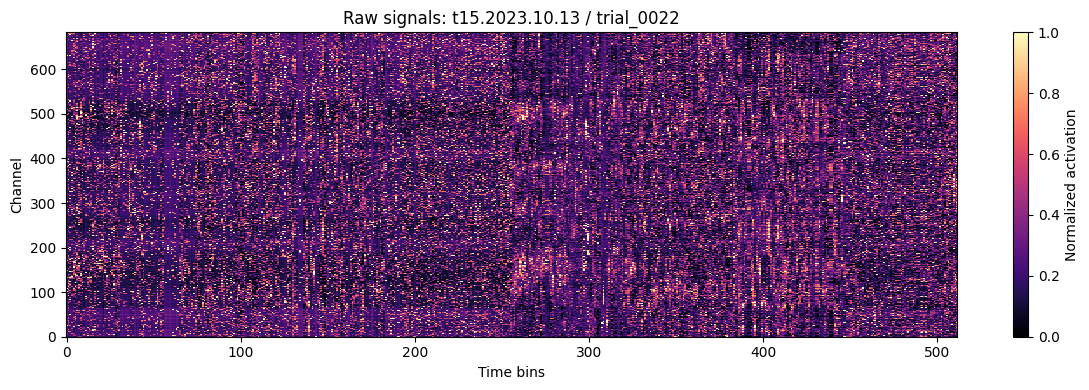

Running chunked Agglomerative clustering (k=8, window=10)...


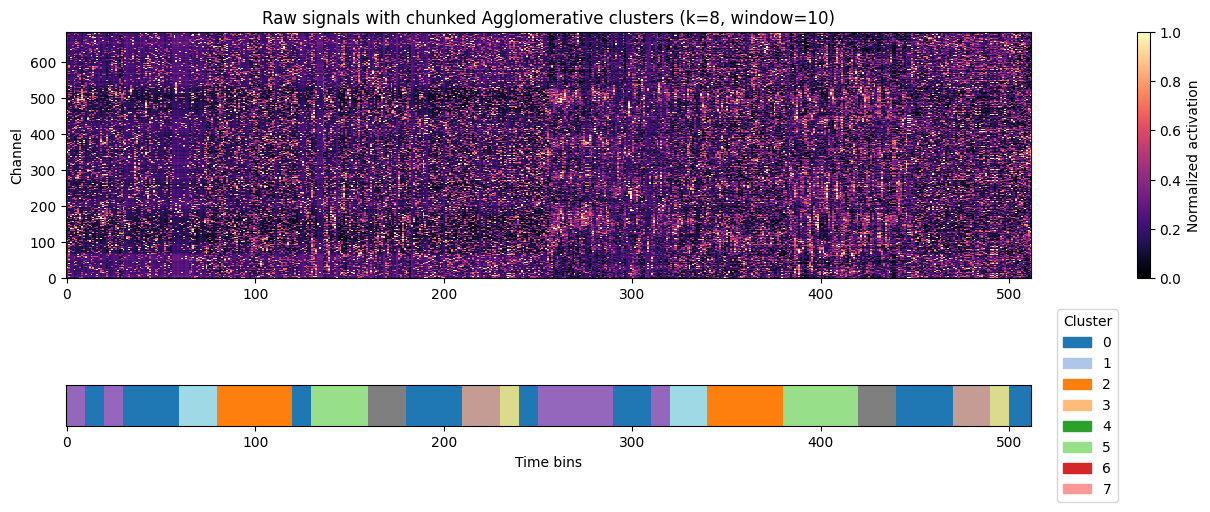

In [ ]:
# -------------------------------------------------
# RAW visualizations (heatmap of time x channels)
# No embeddings 
# -------------------------------------------------

def _align_labels_to_length(labels, target_len):
    """Align a 1D label array to length `target_len` by nearest-neighbor indexing."""
    labels = np.asarray(labels)
    if labels.size == 0 or target_len == 0:
        return np.array([], dtype=int)
    if labels.ndim != 1:
        labels = labels.ravel()
    n = labels.shape[0]
    if n == target_len:
        return labels.astype(int)
    idx = np.linspace(0, n - 1, num=target_len)
    idx_nn = np.round(idx).astype(int)
    aligned = labels[idx_nn].astype(int)
    print(f"Note: aligning labels length {n} -> {target_len} via nearest-neighbor mapping.")
    return aligned


def plot_raw_image_from_features(features, title=None, cmap='magma'):
    """Compute and plot a heatmap of the raw per-bin signals. Returns X_raw (T_bins x channels)."""
    _, X_raw = cu.preprocess_trial_features(features)
    if getattr(X_raw, 'size', 0) == 0:
        print('Empty X_raw — nothing to plot.')
        return X_raw
    # Transpose 
    data = X_raw.T
    T = X_raw.shape[0]
    F = data.shape[0]
    plt.figure(figsize=(12, 4))
    im = plt.imshow(data, aspect='auto', cmap=cmap, interpolation='nearest', origin='lower', extent=[-0.5, T-0.5, 0, F])
    plt.xlabel('Time bins')
    plt.ylabel('Channel')
    if title: plt.title(title)
    plt.colorbar(im, label='Normalized activation')
    plt.tight_layout()
    plt.show()
    return X_raw


def plot_raw_with_cluster_overlay(features, labels, title=None, cmap='magma'):
    """Plot raw heatmap with a thin cluster-ID bar beneath. If `labels` length differs
    it will be aligned to the number of time bins using nearest-neighbor mapping. The heatmap
    and cluster-bar share the same x-axis so time bins align exactly."""
    _, X_raw = cu.preprocess_trial_features(features)
    if getattr(X_raw, 'size', 0) == 0:
        print('Empty X_raw — nothing to plot.')
        return
    data = X_raw.T  # shape = (channels, time_bins)
    T = X_raw.shape[0]
    F = data.shape[0]
    
    # Align cluster labels to match time bins
    cluster_arr = np.asarray(labels)
    if cluster_arr.ndim != 1:
        cluster_arr = cluster_arr.ravel()
    
    if cluster_arr.size > 0 and cluster_arr.shape[0] != T:
        cluster_arr = _align_labels_to_length(cluster_arr, T)
    
    # Create figure with shared x-axis - use constrained layout for better alignment
    fig = plt.figure(figsize=(12, 5), constrained_layout=True)
    gs = fig.add_gridspec(2, 1, height_ratios=[6, 1], hspace=0)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
    
    # Plot heatmap with exact extent
    im = ax1.imshow(data, aspect='auto', cmap=cmap, interpolation='nearest', 
                    origin='lower', extent=[-0.5, T-0.5, 0, F])
    ax1.set_ylabel('Channel')
    if title: ax1.set_title(title)
    ax1.set_xlim(-0.5, T-0.5)
    
    # Colorbar anchored to the heatmap axis
    cbar = fig.colorbar(im, ax=ax1, orientation='vertical', pad=0.02, fraction=0.046)
    cbar.set_label('Normalized activation')
    
    # Cluster bar with matching extent
    if cluster_arr.size == 0:
        print('Empty cluster labels — showing heatmap only.')
        ax2.set_visible(False)
    else:
        cluster_img = cluster_arr.reshape(1, -1)
        cmap2 = plt.get_cmap('tab20')
        
        # Plot cluster bar with identical extent to ensure alignment
        ax2.imshow(cluster_img, aspect='auto', cmap=cmap2, interpolation='nearest', 
                   origin='lower', extent=[-0.5, T-0.5, 0, 1])
        ax2.set_yticks([])
        ax2.set_xlabel('Time bins')
        ax2.set_xlim(-0.5, T-0.5)
        
        # Add legend
        uniq = np.unique(cluster_arr)
        handles = [plt.Rectangle((0,0),1,1,color=cmap2(int(u) % 20)) for u in uniq]
        ax2.legend(handles, [str(int(u)) for u in uniq], title='Cluster', 
                   bbox_to_anchor=(1.02, 0.5), loc='center left', frameon=True)
    
    plt.show()

if 'rep_trials' in globals() and len(rep_trials) > 0:
    _row = rep_trials.iloc[0]
else:
    _row = df_val.iloc[0]

with h5py.File(_row['path'], 'r') as _h5:
    _features = _h5[_row['trial']]['input_features'][:]

print('Plotting raw heatmap for:', _row['trial'])
plot_raw_image_from_features(_features, title=f"Raw signals: {_row['session']} / {_row['trial']}")

# Chunked clustering overlay using Agglomerative (best for chunked raw)
_, _Xtmp = cu.preprocess_trial_features(_features)
if getattr(_Xtmp, 'shape', (0,))[0] >= WINDOW_SIZE:
    print(f'Running chunked Agglomerative clustering (k={BEST_K_CHUNK_RAW}, window={WINDOW_SIZE})...')
    X_chunks, bounds = cu.chunk_time_series(_Xtmp, window_size=WINDOW_SIZE, overlap=OVERLAP)
    
    if X_chunks.shape[0] > 0:
        # Run agglomerative on chunks
        labels_chunk, _ = cu.run_agglomerative(X_chunks, n_clusters=BEST_K_CHUNK_RAW)
        
        # Expand chunk labels to time bin resolution by mapping each chunk to its time range
        labels_expanded = np.zeros(_Xtmp.shape[0], dtype=int)
        for chunk_idx, (start_bin, end_bin) in enumerate(bounds):
            labels_expanded[start_bin:end_bin] = labels_chunk[chunk_idx]
        
        plot_raw_with_cluster_overlay(_features, labels_expanded, 
                                      title=f"Raw signals with chunked Agglomerative clusters (k={BEST_K_CHUNK_RAW}, window={WINDOW_SIZE})")
    else:
        print('No chunks produced — check window size.')
else:
    print(f'Not enough time bins for chunking (need at least {WINDOW_SIZE}).')


In [ ]:
# ----------------------------
# ACROSS-TRIAL KMEANS ON RAW 
# ----------------------------

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd

# sample trails from train dataset
df_train = df_trials[df_trials['split'] == 'train'].reset_index(drop=True)
df_sample_kmeans = df_train.sample(min(300, len(df_train)), random_state=0).reset_index(drop=True)

# Build X_all_raw 
X_all_raw_list = []
for _, row in df_sample_kmeans.iterrows():
    with h5py.File(row['path'], 'r') as h5:
        features = h5[row['trial']]['input_features'][:]
    _, X_raw = cu.preprocess_trial_features(features)   # X_raw: (T_bins, F)
    if X_raw.size:
        X_all_raw_list.append(X_raw)

if len(X_all_raw_list) == 0:
    raise RuntimeError("No raw data found to build X_all_raw (check df_sample_kmeans).")

X_all_raw = np.vstack(X_all_raw_list)
print("X_all_raw shape (time bins across sampled trials):", X_all_raw.shape)


k_values = [2,3,4,5,6,8,10]
raw_results = []
raw_sizes = []


use_mini = False
mini_batch_threshold = 200_000  

for k in k_values:
    print(f"\nFitting KMeans (RAW) with k={k} ...")
    if use_mini and X_all_raw.shape[0] > mini_batch_threshold:
        km_model = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=1024)
    else:
        km_model = KMeans(n_clusters=k, n_init=10, random_state=0)

    labels = km_model.fit_predict(X_all_raw)
    # Davies–Bouldin 
    try:
        db = cu.compute_db(X_all_raw, labels)
    except Exception:
        db = np.nan

    # Silhouette
    try:
        n_points = len(labels)
        if n_points > 20000:
            sil = silhouette_score(X_all_raw, labels, sample_size=10000, random_state=0)
        else:
            sil = silhouette_score(X_all_raw, labels)
    except Exception:
        sil = np.nan

    # WCSS
    try:
        wcss = cu.compute_wcss(X_all_raw, labels)
    except Exception:
        # fallback to inertia if available
        wcss = float(getattr(km_model, "inertia_", np.nan))

    # cluster sizes
    unique, counts = np.unique(labels, return_counts=True)
    size_dict = {f"cluster_{int(c)}": int(n) for c, n in zip(unique, counts)}
    size_row = {"k": k}
    size_row.update(size_dict)

    raw_results.append({"k": k, "db": float(db), "sil": float(sil), "wcss": float(wcss)})
    raw_sizes.append(size_row)

df_raw_kmeans = pd.DataFrame(raw_results)
df_raw_sizes = pd.DataFrame(raw_sizes).fillna(0).astype({c:int for c in df_raw_sizes.columns} if 'df_raw_sizes' in globals() else {})

print("\nAcross-trial RAW KMeans metrics:")
display(df_raw_kmeans)


X_all_raw shape (time bins across sampled trials): (153600, 256)

Fitting KMeans (RAW) with k=2 ...

Fitting KMeans (RAW) with k=3 ...

Fitting KMeans (RAW) with k=3 ...

Fitting KMeans (RAW) with k=4 ...

Fitting KMeans (RAW) with k=4 ...

Fitting KMeans (RAW) with k=5 ...

Fitting KMeans (RAW) with k=5 ...

Fitting KMeans (RAW) with k=6 ...

Fitting KMeans (RAW) with k=6 ...

Fitting KMeans (RAW) with k=8 ...

Fitting KMeans (RAW) with k=8 ...

Fitting KMeans (RAW) with k=10 ...

Fitting KMeans (RAW) with k=10 ...

Across-trial RAW KMeans metrics:

Across-trial RAW KMeans metrics:


,k,db,sil,wcss
0,2,5.275019,0.034006,1472526.000
1,3,7.135757,0.006622,1458799.250
2,4,7.708269,0.006276,1451236.000
3,5,7.407312,0.006332,1445213.875
4,6,7.440549,-0.005384,1439983.000
5,8,7.517770,-0.009793,1432220.625
6,10,7.310521,-0.010834,1426337.375


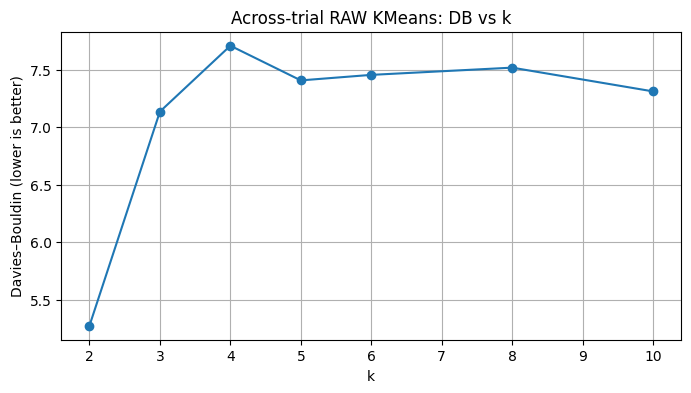

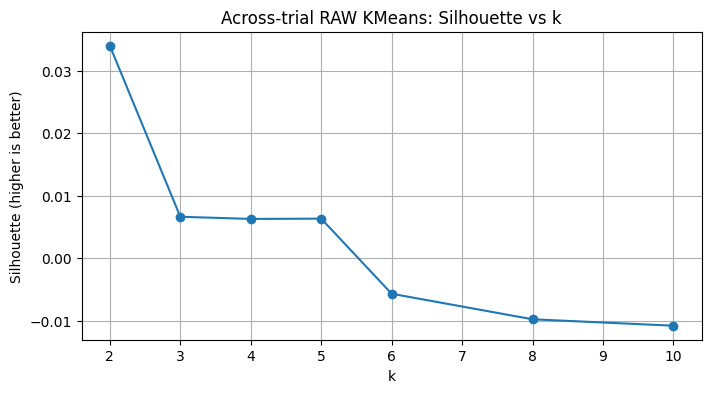

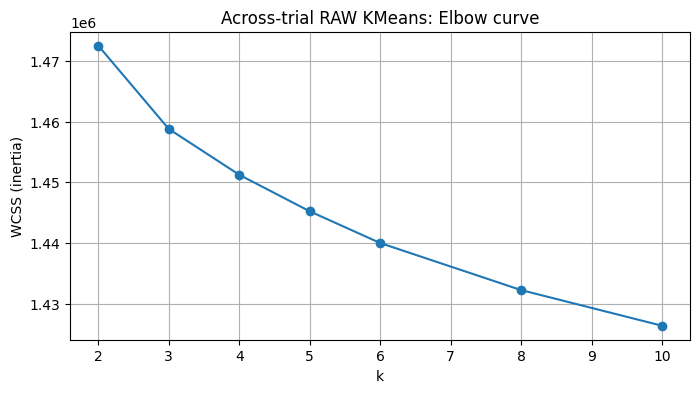

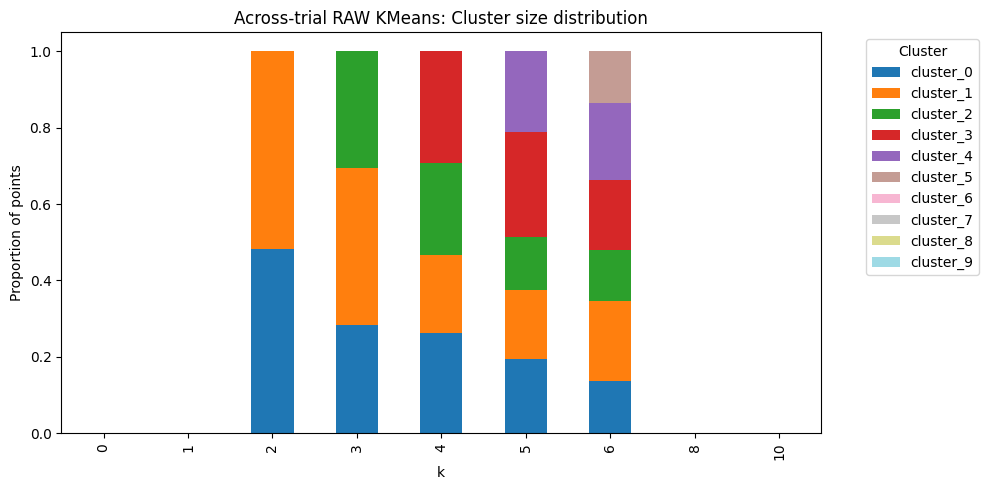

In [20]:
# DB and Silhouette vs k
plt.figure(figsize=(8,4))
plt.plot(df_raw_kmeans["k"], df_raw_kmeans["db"], marker="o")
plt.xlabel("k")
plt.ylabel("Davies–Bouldin (lower is better)")
plt.title("Across-trial RAW KMeans: DB vs k")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df_raw_kmeans["k"], df_raw_kmeans["sil"], marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette (higher is better)")
plt.title("Across-trial RAW KMeans: Silhouette vs k")
plt.grid(True)
plt.show()

# Elbow (WCSS)
plt.figure(figsize=(8,4))
plt.plot(df_raw_kmeans["k"], df_raw_kmeans["wcss"], marker="o")
plt.xlabel("k")
plt.ylabel("WCSS (inertia)")
plt.title("Across-trial RAW KMeans: Elbow curve")
plt.grid(True)
plt.show()

# Cluster size distribution (as percentages)
cluster_cols = [c for c in df_raw_sizes.columns if c.startswith("cluster_")]
sizes_raw_pct = df_raw_sizes.set_index("k")[cluster_cols].div(
    df_raw_sizes[cluster_cols].sum(axis=1), axis=0
)

sizes_raw_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5),
    colormap="tab20"
)
plt.title("Across-trial RAW KMeans: Cluster size distribution")
plt.ylabel("Proportion of points")
plt.xlabel("k")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
# Across-trial RAW -> export cluster_id -> [descriptor strings]
import pickle
from sklearn.cluster import KMeans
import numpy as np

df_val_kmeans = df_val.reset_index(drop=True)
X_all_raw_list = []
desc_list = []   # one descriptor per row in X_all_raw
for _, row in df_val_kmeans.iterrows():
    with h5py.File(row['path'], 'r') as h5:
        features = h5[row['trial']]['input_features'][:]
    _, X_raw = cu.preprocess_trial_features(features)   # X_raw: (T_bins, F)
    if X_raw.size:
        X_all_raw_list.append(X_raw)
        # descriptors aligned with rows of X_raw
        desc_list.extend([f"{row['split']}/{row['session']}/{row['trial']}_bin{t}" for t in range(X_raw.shape[0])])

if len(X_all_raw_list) == 0:
    raise RuntimeError("No raw data found to build X_all_raw (check df_val_kmeans).")

X_all_raw = np.vstack(X_all_raw_list)
print("X_all_raw shape:", X_all_raw.shape, "n_descriptors:", len(desc_list))

# Fit KMeans 
k = 5
km = KMeans(n_clusters=k, n_init=10, random_state=0)
labels = km.fit_predict(X_all_raw)

# Build mapping cluster_id -> list of descriptors
clusters_map = {}
for c in np.unique(labels):
    idxs = np.where(labels == c)[0]
    clusters_map[int(c)] = [desc_list[i] for i in idxs]

# Save pickle
with open('across_trial_clusters_raw.pkl', 'wb') as f:
    pickle.dump(clusters_map, f, protocol=4)



df_map = pd.DataFrame({'descriptor': desc_list, 'cluster': labels})
df_map.to_csv('across_trial_clusters_raw_map.csv', index=False)

print("Saved across_trial_clusters_raw.pkl and across_trial_clusters_raw_map.csv")

X_all_raw shape: (730112, 256) n_descriptors: 730112
Saved across_trial_clusters_raw.pkl and across_trial_clusters_raw_map.csv


In [ ]:
# -------------------------------------------
# BUILD CHUNKED RAW ACROSS-TRIAL DATA MATRIX 
# -------------------------------------------

X_all_chunks_list = []
for _, row in df_sample_kmeans.iterrows():
    with h5py.File(row['path'], 'r') as h5:
        features = h5[row['trial']]['input_features'][:]
    _, X_raw = cu.preprocess_trial_features(features)
    X_chunks, bounds = cu.chunk_time_series(X_raw, window_size=WINDOW_SIZE, overlap=OVERLAP)
    if X_chunks.size:
        X_all_chunks_list.append(X_chunks)

if len(X_all_chunks_list) == 0:
    raise RuntimeError("No chunked data found to build X_all_chunks (check parameters).")

X_all_chunks = np.vstack(X_all_chunks_list)
print("X_all_chunks shape (chunks across sampled trials):", X_all_chunks.shape)


k_values = [2,3,4,5,6,8,10]
chunk_results = []
chunk_sizes = []

use_mini = False
mini_batch_threshold = 200_000

for k in k_values:
    print(f"\nFitting KMeans (CHUNKED RAW) with k={k} ...")
    if use_mini and X_all_chunks.shape[0] > mini_batch_threshold:
        km_model = MiniBatchKMeans(n_clusters=k, random_state=0, batch_size=1024)
    else:
        km_model = KMeans(n_clusters=k, n_init=10, random_state=0)

    labels = km_model.fit_predict(X_all_chunks)

    try:
        db = cu.compute_db(X_all_chunks, labels)
    except Exception:
        db = np.nan

    try:
        n_points = len(labels)
        if n_points > 20000:
            sil = silhouette_score(X_all_chunks, labels, sample_size=10000, random_state=0)
        else:
            sil = silhouette_score(X_all_chunks, labels)
    except Exception:
        sil = np.nan

    try:
        wcss = cu.compute_wcss(X_all_chunks, labels)
    except Exception:
        wcss = float(getattr(km_model, "inertia_", np.nan))

    unique, counts = np.unique(labels, return_counts=True)
    size_dict = {f"cluster_{int(c)}": int(n) for c, n in zip(unique, counts)}
    size_row = {"k": k}
    size_row.update(size_dict)

    chunk_results.append({"k": k, "db": float(db), "sil": float(sil), "wcss": float(wcss)})
    chunk_sizes.append(size_row)

df_chunk_kmeans = pd.DataFrame(chunk_results)
df_chunk_sizes = pd.DataFrame(chunk_sizes).fillna(0)

print("\nAcross-trial CHUNKED RAW KMeans metrics:")
display(df_chunk_kmeans)


X_all_chunks shape (chunks across sampled trials): (15300, 256)

Fitting KMeans (CHUNKED RAW) with k=2 ...

Fitting KMeans (CHUNKED RAW) with k=3 ...

Fitting KMeans (CHUNKED RAW) with k=3 ...

Fitting KMeans (CHUNKED RAW) with k=4 ...

Fitting KMeans (CHUNKED RAW) with k=4 ...

Fitting KMeans (CHUNKED RAW) with k=5 ...

Fitting KMeans (CHUNKED RAW) with k=5 ...

Fitting KMeans (CHUNKED RAW) with k=6 ...

Fitting KMeans (CHUNKED RAW) with k=6 ...

Fitting KMeans (CHUNKED RAW) with k=8 ...

Fitting KMeans (CHUNKED RAW) with k=8 ...

Fitting KMeans (CHUNKED RAW) with k=10 ...

Fitting KMeans (CHUNKED RAW) with k=10 ...

Across-trial CHUNKED RAW KMeans metrics:

Across-trial CHUNKED RAW KMeans metrics:


,k,db,sil,wcss
0,2,2.609557,0.106674,30994.757812
1,3,3.644501,0.054602,29892.091797
2,4,4.517979,0.032992,29464.246094
3,5,4.461771,0.030058,29096.859375
4,6,4.444894,0.028748,28831.349609
5,8,4.852118,0.016789,28453.054688
6,10,4.766464,0.011524,28155.000000


In [ ]:
# Compare RAW vs Chunked-RAW

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_db_cmp = pd.concat([
    df_db_raw.assign(representation="raw"),
    df_db_chunk_raw.assign(representation="chunk_raw")
], ignore_index=True)

df_sil_cmp = pd.concat([
    df_sil_raw.assign(representation="raw"),
    df_sil_chunk_raw.assign(representation="chunk_raw")
], ignore_index=True)

df_wcss_cmp = pd.concat([
    df_wcss_raw.assign(representation="raw"),
    df_wcss_chunk_raw.assign(representation="chunk_raw")
], ignore_index=True)

# Prepare cluster-size proportion tables for stacked bar comparison
df_sizes_raw_f = df_sizes_raw.fillna(0)
df_sizes_chunk_f = df_sizes_chunk_raw.fillna(0)

numeric_cols_raw = [c for c in df_sizes_raw_f.columns if c not in ["trial","algorithm","k"]]

grouped_raw = df_sizes_raw_f.groupby(["algorithm","k"])[numeric_cols_raw].mean()
grouped_pct_raw = grouped_raw.div(grouped_raw.sum(axis=1), axis=0)

grouped_chunk = df_sizes_chunk_f.groupby(["algorithm","k"])[numeric_cols_raw].mean()
grouped_pct_chunk = grouped_chunk.div(grouped_chunk.sum(axis=1), axis=0)

# Average across algorithms for a compact comparison per k
raw_mean = grouped_pct_raw.groupby(level='k').mean()
chunk_mean = grouped_pct_chunk.groupby(level='k').mean()


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Davies–Bouldin (top-left)
sns.lineplot(data=df_db_cmp, x="k", y="db", hue="algorithm", style="representation",
             markers=True, dashes=False, ax=axes[0, 0])
axes[0, 0].set_title("Davies–Bouldin: raw vs chunked")

# Silhouette (top-right)
sns.lineplot(data=df_sil_cmp, x="k", y="sil", hue="algorithm", style="representation",
             markers=True, dashes=False, ax=axes[0, 1])
axes[0, 1].set_title("Silhouette: raw vs chunked")

# WCSS / Elbow (bottom-left)
sns.lineplot(data=df_wcss_cmp, x="k", y="wcss", hue="algorithm", style="representation",
             markers=True, dashes=False, ax=axes[1, 0])
axes[1, 0].set_title("WCSS: raw vs chunked (Elbow)")

# Cluster size distribution 
ks = sorted(raw_mean.index)
x = np.arange(len(ks))
width = 0.35

colors = plt.get_cmap('tab20').colors
bottoms_raw = np.zeros(len(ks))
bottoms_chunk = np.zeros(len(ks))

for i, col in enumerate(raw_mean.columns):
    vals_raw = raw_mean.loc[ks, col].values
    vals_chunk = chunk_mean.loc[ks, col].values
    axes[1, 1].bar(x - width/2, vals_raw, width, bottom=bottoms_raw, color=colors[i % len(colors)], alpha=0.9)
    axes[1, 1].bar(x + width/2, vals_chunk, width, bottom=bottoms_chunk, color=colors[i % len(colors)], alpha=0.45)
    bottoms_raw += vals_raw
    bottoms_chunk += vals_chunk

axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(ks)
axes[1, 1].set_xlabel('k')
axes[1, 1].set_title('Cluster Size Distribution (raw vs chunked)')

# Legend: cluster labels
cluster_labels = [f'cluster_{c}' for c in raw_mean.columns]
axes[1, 1].legend(cluster_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


NameError: name 'df_db_raw' is not defined

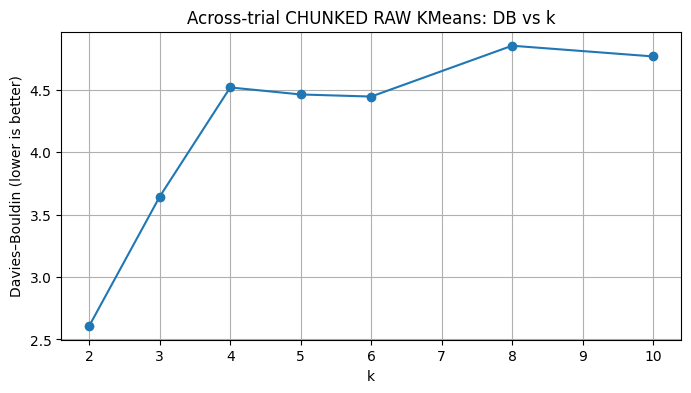

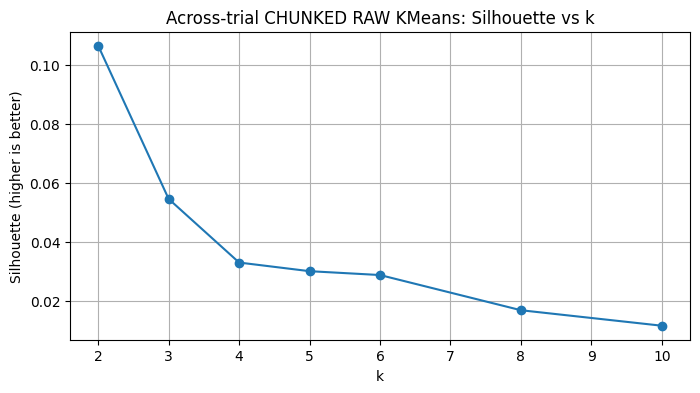

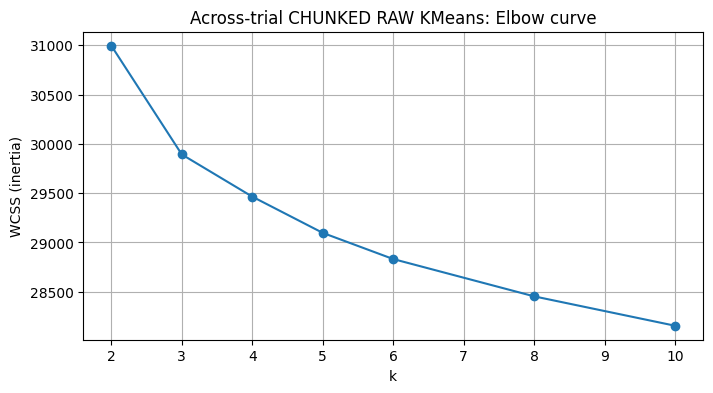

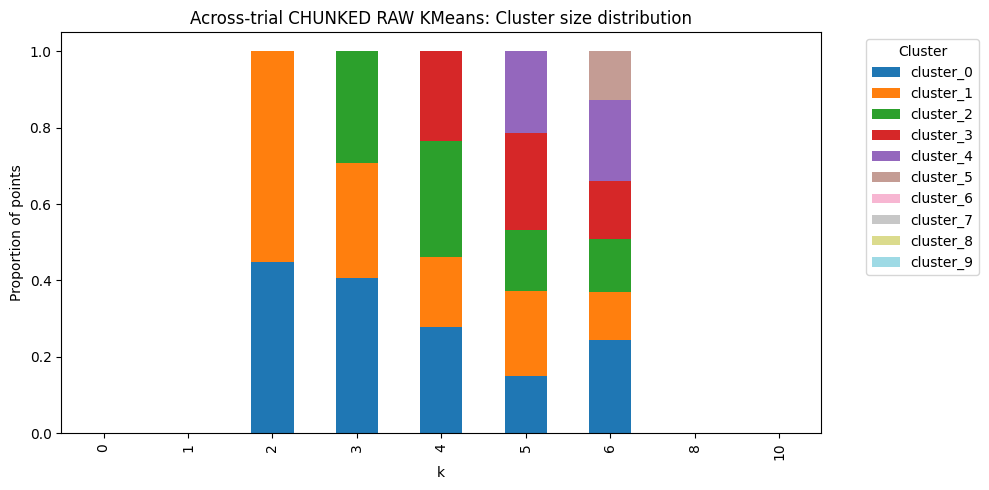

In [7]:
# DB and Silhouette vs k
plt.figure(figsize=(8,4))
plt.plot(df_chunk_kmeans["k"], df_chunk_kmeans["db"], marker="o")
plt.xlabel("k")
plt.ylabel("Davies–Bouldin (lower is better)")
plt.title("Across-trial CHUNKED RAW KMeans: DB vs k")
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(df_chunk_kmeans["k"], df_chunk_kmeans["sil"], marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette (higher is better)")
plt.title("Across-trial CHUNKED RAW KMeans: Silhouette vs k")
plt.grid(True)
plt.show()

# Elbow (WCSS)
plt.figure(figsize=(8,4))
plt.plot(df_chunk_kmeans["k"], df_chunk_kmeans["wcss"], marker="o")
plt.xlabel("k")
plt.ylabel("WCSS (inertia)")
plt.title("Across-trial CHUNKED RAW KMeans: Elbow curve")
plt.grid(True)
plt.show()

# Cluster size distribution
cluster_cols = [c for c in df_chunk_sizes.columns if c.startswith("cluster_")]
sizes_chunk_pct = df_chunk_sizes.set_index("k")[cluster_cols].div(
    df_chunk_sizes[cluster_cols].sum(axis=1), axis=0
)

sizes_chunk_pct.plot(
    kind="bar",
    stacked=True,
    figsize=(10,5),
    colormap="tab20"
)
plt.title("Across-trial CHUNKED RAW KMeans: Cluster size distribution")
plt.ylabel("Proportion of points")
plt.xlabel("k")
plt.legend(title="Cluster", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


In [ ]:
# Across-trial CHUNKED -> export cluster_id -> [descriptor strings]
import pickle
from sklearn.cluster import KMeans
import numpy as np

df_val_kmeans = df_val.reset_index(drop=True)
X_all_chunks_list = []
desc_chunks = []   # descriptors for each chunk row
for _, row in df_val_kmeans.iterrows():
    with h5py.File(row['path'], 'r') as h5:
        features = h5[row['trial']]['input_features'][:]
    _, X_raw = cu.preprocess_trial_features(features)
    X_chunks, bounds = cu.chunk_time_series(X_raw, window_size=WINDOW_SIZE, overlap=OVERLAP)
    if X_chunks.size:
        X_all_chunks_list.append(X_chunks)
        # bounds is list of (start_bin, end_bin) for each chunk
        desc_chunks.extend([f"{row['split']}/{row['session']}/{row['trial']}_chunk{j}_bins{start}-{end}"
                             for j, (start, end) in enumerate(bounds)])

if len(X_all_chunks_list) == 0:
    raise RuntimeError("No chunked data found to build X_all_chunks (check parameters).")

X_all_chunks = np.vstack(X_all_chunks_list)
print("X_all_chunks shape:", X_all_chunks.shape, "n_descriptors:", len(desc_chunks))

# Fit clustering 
k = 3
km = KMeans(n_clusters=k, n_init=10, random_state=0)
labels_chunks = km.fit_predict(X_all_chunks)

# Build mapping cluster_id -> list of chunk descriptors
clusters_map_chunks = {}
for c in np.unique(labels_chunks):
    idxs = np.where(labels_chunks == c)[0]
    clusters_map_chunks[int(c)] = [desc_chunks[i] for i in idxs]

# Save pickle
with open('across_trial_clusters_chunked.pkl', 'wb') as f:
    pickle.dump(clusters_map_chunks, f, protocol=4)

# DataFrame
import pandas as pd
df_map_chunks = pd.DataFrame({'descriptor': desc_chunks, 'cluster': labels_chunks})
df_map_chunks.to_csv('across_trial_clusters_chunked_map.csv', index=False)

print("Saved across_trial_clusters_chunked.pkl and across_trial_clusters_chunked_map.csv")

X_all_chunks shape: (72726, 256) n_descriptors: 72726
Saved across_trial_clusters_chunked.pkl and across_trial_clusters_chunked_map.csv
Saved across_trial_clusters_chunked.pkl and across_trial_clusters_chunked_map.csv


In [ ]:
# Compute and save DB, Silhouette, WCSS for the existing VAL chunked clustering

assert 'X_all_chunks' in globals() and 'labels_chunks' in globals(), "Run the VAL chunked cell first (X_all_chunks, labels_chunks)."

metrics = {}
n_points = len(labels_chunks)
unique_clusters = np.unique(labels_chunks)

# Davies–Bouldin
try:
    metrics['db'] = float(cu.compute_db(X_all_chunks, labels_chunks))
except Exception as e:
    metrics['db'] = float('nan')
    print("Warning: compute_db failed:", e)

# Silhouette (only valid if >1 cluster)
try:
    if len(unique_clusters) > 1:
        if n_points > 20000:
            metrics['silhouette'] = float(silhouette_score(X_all_chunks, labels_chunks, sample_size=10000, random_state=0))
        else:
            metrics['silhouette'] = float(silhouette_score(X_all_chunks, labels_chunks))
    else:
        metrics['silhouette'] = float('nan')
        print("Silhouette: only one cluster present — returning NaN.")
except Exception as e:
    metrics['silhouette'] = float('nan')
    print("Warning: silhouette_score failed:", e)

# WCSS (prefer helper, fallback to model inertia_ if 'km' exists)
try:
    metrics['wcss'] = float(cu.compute_wcss(X_all_chunks, labels_chunks))
except Exception:
    metrics['wcss'] = float(getattr(globals().get('km', None), "inertia_", float('nan')))

# Print
print("VAL chunked clustering final metrics:")
print(f"  n_points = {n_points}")
print(f"  n_clusters = {len(unique_clusters)}")
print(f"  Davies–Bouldin: {metrics['db']}")
print(f"  Silhouette:     {metrics['silhouette']}")
print(f"  WCSS (inertia): {metrics['wcss']}")

# Save a small record
out_df = pd.DataFrame([{
    'n_points': n_points,
    'n_clusters': int(len(unique_clusters)),
    'db': metrics['db'],
    'silhouette': metrics['silhouette'],
    'wcss': metrics['wcss']
}])
out_df.to_csv('across_trial_chunked_val_metrics.csv', index=False)
with open('across_trial_chunked_val_metrics.pkl', 'wb') as f:
    pickle.dump(metrics, f, protocol=4)

print("Saved across_trial_chunked_val_metrics.csv and across_trial_chunked_val_metrics.pkl")

VAL chunked clustering final metrics:
  n_points = 72726
  n_clusters = 3
  Davies–Bouldin: 3.629340380495666
  Silhouette:     0.054763250052928925
  WCSS (inertia): 140043.21875
Saved across_trial_chunked_val_metrics.csv and across_trial_chunked_val_metrics.pkl
